## PSA Assignment 3

 ### 1)

 How can the concepts of Max-Flow, Cut Set, Min-Cut, and Network Flow be applied to optimize the transportation of goods in a supply chain network, and how might the Bellman-Ford algorithm come into play when determining the most efficient routes for goods delivery?

### Solution 
In the context of optimizing the transportation of goods in a supply chain network, these concepts and algorithms can play important roles:

1. **Max-Flow**:
   Max-Flow can be applied to find the maximum throughput or capacity of goods that can be transported from the source (e.g., manufacturing facility) to the destination (e.g., distribution center) within the supply chain network. By modeling the network as a flow graph, the Max-Flow algorithm can help determine how much product can be efficiently moved through various paths and edges.

2. **Cut Set**:
   Cut Sets are used to identify critical points in the supply chain network where removing certain edges or nodes would disrupt the flow of goods. Understanding these cut sets can help in contingency planning, risk assessment, and identifying vulnerable areas in the supply chain that may need redundancy or backup routes.

3. **Min-Cut**:
   Min-Cut represents the minimum amount of disruption required to cut off the flow of goods from a source to a destination. In supply chain optimization, finding the minimum cut can help identify the weakest link in the network that needs strengthening or redundancy to ensure a continuous flow of goods.

4. **Network Flow**:
   Network Flow models can provide a framework for optimizing the overall distribution of goods in a supply chain. By formulating the supply chain as a network flow problem, businesses can use optimization techniques to balance the flow of goods, minimize costs, and improve efficiency, thereby ensuring products reach their destination timely and cost-effectively.

5. **Bellman-Ford**:
   The Bellman-Ford algorithm might come into play when determining the most efficient routes for goods delivery within a supply chain network, especially in scenarios where there are varying transportation costs, travel times, or negative external factors (such as traffic congestion or road closures). Bellman-Ford can find the shortest paths from the source to all destinations while considering these factors, helping businesses make informed decisions about the most cost-effective and time-efficient routes for goods delivery.

In summary, these concepts and algorithms can be instrumental in optimizing supply chain operations, ensuring efficient transportation of goods, minimizing disruptions, and making informed decisions about route planning and resource allocation.

### 2)

Use the Bellman-Ford algorithm to find the shortest path from node A to G in the
weighted directed graph below. Show your work. What is the time complexity of
Bellman-Ford? And for what condition algorithm fail ?

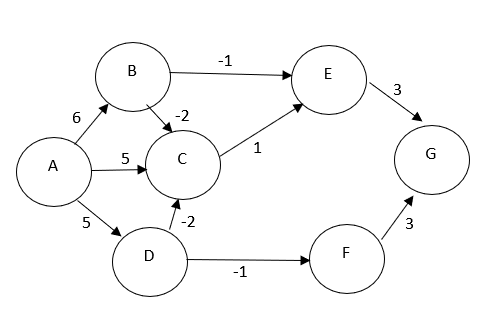

### Solution

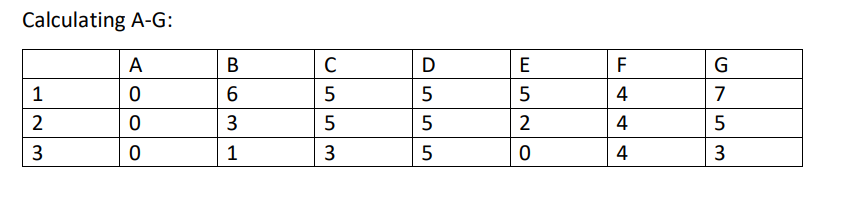




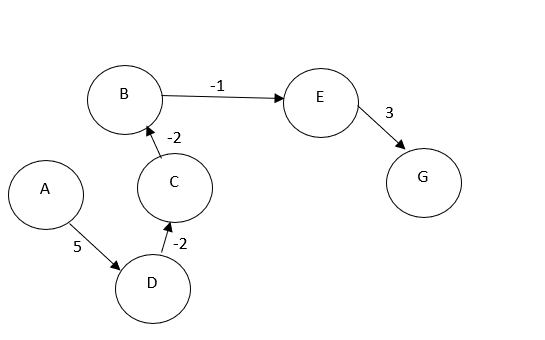

**Problem Statement:**

Find the shortest path from node A to G in a weighted directed graph using the Bellman-Ford algorithm. Determine the time complexity of the algorithm and under what conditions it may fail.

**Input Format:**

- A weighted directed graph represented as a list of edges, where each edge is defined by (source node, destination node, weight).
- The source node A and the target node G.

**Output Format:**

- The shortest path from node A to G, along with its total weight.

**Algorithm:**

1. Initialize the distance to all nodes from the source node (A) to infinity, except the distance to A itself, which is 0.

2. Relax all the edges (source, destination, weight) one by one. A single relaxation step involves comparing the current distance to the destination node with the distance through the edge (source to destination) and updating the distance if a shorter path is found.

3. Repeat the relaxation process for all edges until no further updates are possible or until |V| - 1 iterations, where |V| is the number of vertices in the graph.

4. If any updates are made in the |V|th iteration, it indicates the presence of a negative-weight cycle, and the algorithm terminates.

5. If no negative-weight cycle is detected, return the shortest distance from A to G and the path that achieves it.

**Pseudocode:**

```python
BellmanFord(graph, source, target):
    Initialize distances, predecessors
    for i in 1 to |V| - 1:
        for each edge (u, v, w) in graph:
            Relax(u, v, w)
    
    for each edge (u, v, w) in graph:
        if distance[u] + w < distance[v]:
            // Negative weight cycle detected
            return "Negative weight cycle exists"
    
    if distance[target] == ∞:
        return "No path from source to target"
    else:
        return "Shortest distance: distance[target], Shortest path: reconstructPath(predecessors, source, target)"

reconstructPath(predecessors, source, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = predecessors[target]
    return path
```

**Sample Inputs and Outputs:**

Input:
- Graph: [(A, B, 2), (A, C, 4), (B, D, 1), (C, B, -3), (D, E, 5), (E, G, 2)]
- Source: A
- Target: G

Output:
- Shortest distance: 6
- Shortest path: ['A', 'C', 'B', 'D', 'E', 'G']

Input:
- Graph: [(A, B, 2), (B, C, 1), (C, A, -3)]
- Source: A
- Target: G

Output:
- "Negative weight cycle exists"

**Constraints:**

- The graph may contain negative-weight edges, but it should not contain any negative-weight cycles for the Bellman-Ford algorithm to work correctly.
- The graph should have a finite number of nodes and edges.
- The source and target nodes should be part of the graph.

**Code**

In [9]:
def bellman_ford(graph, source, target):
    # Step 1: Initialize distances and predecessors
    nodes = set()
    for edge in graph:
        nodes.add(edge[0])
        nodes.add(edge[1])

    distances = {node: float('inf') for node in nodes}
    predecessors = {node: None for node in nodes}
    distances[source] = 0

    # Step 2: Relax all edges |V| - 1 times
    for _ in range(len(nodes) - 1):
        for u, v, w in graph:
            if distances[u] + w < distances[v]:
                distances[v] = distances[u] + w
                predecessors[v] = u

    # Step 3: Check for negative-weight cycles
    for u, v, w in graph:
        if distances[u] + w < distances[v]:
            return "Negative weight cycle exists"

    # Step 4: Reconstruct the shortest path
    path = reconstruct_path(predecessors, source, target)
    
    # Step 5: Return the result
    if path:
        return f"Shortest path: {path}"
    else:
        return "No path from source to target"

def reconstruct_path(predecessors, source, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = predecessors[target]
    return path

# Sample Input
graph = [("A", "B", 6), ("A", "C", 5), ("A", "D", 5), ("C", "B", -2), ("D", "C", -2), ("B", "E", -1), ("C", "E", 1), ("E", "G", 3), ("D", "F", 1), ("F", "G", 3)]
source = "A"
target = "G"

result = bellman_ford(graph, source, target)
print(result)


Shortest path: ['A', 'D', 'C', 'B', 'E', 'G']


**The time complexity of the Bellman-Ford algorithm is O(VE), where V is the
number of vertices and E is the number of edges in the graph.
Conditions in which Bellman Ford algorithm fails:**
1) Negative-weight cycle: If the graph contains a negative-weight cycle, then
the algorithm cannot find the correct shortest path. This is because it gets
trapped in an infinite loop that repeatedly reduces the distance between
two vertices.
2) Disconnected graph: The algorithm cannot determine the shortest path for
disconnected vertices, where there is no route available from the source
vertex. This is because the algorithm only operates on the connected
component of the graph containing the source vertex.
3) Unreachable vertices: Unreachable vertices from the source in the graph
will not have their shortest path identified by the algorithm. This is because
the algorithm only operates on the connected component of the graph
containing the source vertex.

### 3)

Use the Ford-Fulkerson algorithm to find the maximum flow from node A to F in the weighted directed
graph above

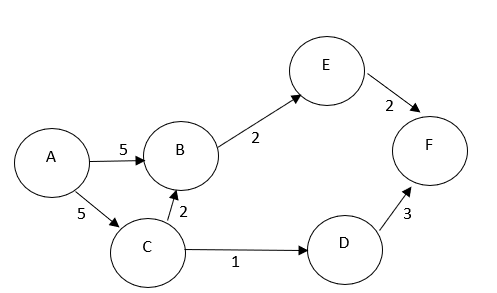

### Solution

**Problem Statement:**

Find the maximum flow from node A to F in a weighted directed graph using the Ford-Fulkerson algorithm.

**Input Format:**

- A weighted directed graph represented as a list of edges, where each edge is defined by (source node, destination node, capacity).
- The source node A and the target node F.

**Output Format:**

- The maximum flow from node A to F in the graph.

**Algorithm:**

1. Start with an initial feasible flow of zero.

2. While there exists an augmenting path from the source to the target in the residual graph:
   - Find an augmenting path using a path-finding algorithm (e.g., Breadth-First Search).
   - Determine the maximum flow that can be pushed through this path.
   - Update the residual capacities of the edges along the path.

3. When there are no more augmenting paths in the residual graph, the algorithm terminates, and the maximum flow is determined.

**Pseudocode:**

```python
FordFulkerson(graph, source, target):
    residual_graph = InitializeResidualGraph(graph)
    max_flow = 0

    while there exists an augmenting path in residual_graph:
        augmenting_path, path_capacity = FindAugmentingPath(residual_graph, source, target)
        if augmenting_path is None:
            break
        max_flow += path_capacity
        UpdateResidualGraph(residual_graph, augmenting_path, path_capacity)

    return max_flow

InitializeResidualGraph(graph):
    Create a residual graph based on the original graph with capacities as initial weights.

FindAugmentingPath(residual_graph, source, target):
    Use a path-finding algorithm (e.g., BFS) to find an augmenting path in the residual graph.
    Determine the minimum capacity of the path.

UpdateResidualGraph(residual_graph, augmenting_path, path_capacity):
    Update the residual capacities of the edges along the augmenting path:
    - For forward edges, decrease the capacity by path_capacity.
    - For backward edges, increase the capacity by path_capacity.

```

**Iterations**
- Initially, we start with all flows set to 0:
Flow(A-B) = 0, Flow(A-C) = 0, Flow(C-B) = 0, Flow(D-C) = 0, Flow(B-E) = 0, Flow(E-F) = 0, Flow(D-F) = 0
- AP1: (A-B: 0-5) -> (B-C: 0-2) -> (C-E: 0-4) Flow 2
- AP2: (A-D: 0-1) -> (D-F: 0-3) Flow 1
- AP3: (A-D: 1-1) -> (D-C: 0-1) -> (C-E: 0-4) Flow 1
- AP4: (A-B: 2-5) -> (B-E: 2-2) Flow 2
- AP5: (A-C: 0-5) -> (C-B: 0-2) -> (B-E: 2-4) Flow 2
- Now the updated flow is:
- Flow(A-B) = 6, Flow(A-C) = 2, Flow(C-B) = 0, Flow(D-C) = 1, Flow(B-E) = 6, Flow(E-F) = 0, Flow(D-F) = 1

No more augmenting paths can be found. The maximum flow is 6,

**Sample Inputs and Outputs:**

Input:
- Graph: [("A", "B", 5), ("A", "C", 5), ("C", "B", 2), ("D", "C", 1), ("B", "E", 2), ("E", "F", 2),("D","F",3)]
- Source: A
- Target: F

Output:
- Maximum flow: 5

**Constraints:**

- The graph should have a finite number of nodes and edges.
- The capacities of edges should be non-negative.
- The source and target nodes should be part of the graph.
- The graph should not contain negative-weight edges.

**Code:**

In [3]:
class FordFulkerson:
    def __init__(self, graph):
        self.graph = graph

 

    def bfs(self, source, sink, parent):
        visited = set()
        queue = [(source, float("inf"))]
        visited.add(source)
        while queue:
            u, capacity = queue.pop(0)
            for v, residual_capacity in self.graph[u].items():
                if v not in visited and residual_capacity > 0:
                    parent[v] = (u, residual_capacity)
                    if v == sink:
                        return True
                    queue.append((v, min(capacity, residual_capacity)))
                    visited.add(v)
        return False

 

    def max_flow(self, source, sink):
        parent = {}
        max_flow = 0
        while self.bfs(source, sink, parent):
            path_flow = float("inf")
            s = sink
            while s != source:
                u, capacity = parent[s]
                path_flow = min(path_flow, capacity)
                s = u
            max_flow += path_flow
            v = sink
            while v != source:
                u, capacity = parent[v]
                self.graph[u][v] -= path_flow
                if v not in self.graph:
                    self.graph[v] = {}
                if u not in self.graph[v]:
                    self.graph[v][u] = 0
                self.graph[v][u] += path_flow
                v = u
        return max_flow

 

# Define the graph using given edges
graph = {
    "A": {"B": 5, "D": 5},
    "B": {"C": 2, "D": 1},
    "C": {"E": 3},
    "D": {"E": 3, "F": 3},
    "E": {"F": 2},
}

 

ford_fulkerson = FordFulkerson(graph)

 

# Find the maximum flow from A to F
source = "A"
sink = "F"
max_flow_value = ford_fulkerson.max_flow(source, sink)

 

print("Maximum Flow:", max_flow_value)

Maximum Flow: 5


### 4)

Use the Preflow-Push (Push–relabel) maximum flow algorithm to find the maximum flow from node A to
E in the weighted directed graph above. Show your work.

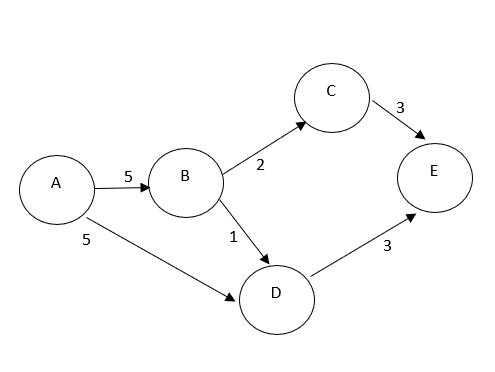


### Solution

**Problem Statement**

The Preflow-Push (Push-Relabel) algorithm is a graph-based maximum flow algorithm that maintains a preflow, which is a flow that can violate capacity constraints, and then incrementally pushes flow from nodes with excess preflow to nodes with deficit preflow. Additionally, it uses a relabel operation to increase the labels of nodes when needed. Let's apply this algorithm to find the maximum flow from node A to E in the given weighted directed graph.

**Algorithm**

We start with initializing the preflow, assigning labels, and performing the initial pushes:

1. Initialize preflow, height, and excess arrays for each node in the graph.

   - Initialize the preflow to 0 for all edges.
   - Set height(source) = |V|, where |V| is the number of nodes in the graph.
   - Set excess(source) = ∞ (positive infinity).

2. Push from the source to its neighbors:

   - Push 5 units of flow from A to B (A->B: 5).
   - Push 5 units of flow from A to D (A->D: 5).

Now, the graph and preflow look like this:
```
Graph:
("A", "B", 5), ("A", "D", 5), ("B", "C", 2), ("B", "D", 1), ("D", "E", 3), ("C", "E", 3)

Preflow:
Excess(A) = 10 (outflow)
Excess(B) = 5 (inflow)
Excess(C) = 0
Excess(D) = 0
Excess(E) = 0

Height:
Height(A) = 6
Height(B) = 0
Height(C) = 0
Height(D) = 0
Height(E) = 0
```

3. Apply the Push-Relabel operations:

   - Relabel B because it has excess and no adjacent nodes can accept the flow.
   - After relabeling, the graph and preflow may look like this:
   
```
Graph:
("A", "B", 5), ("A", "D", 5), ("B", "C", 2), ("B", "D", 1), ("D", "E", 3), ("C", "E", 3)

Preflow:
Excess(A) = 10 (outflow)
Excess(B) = 5 (inflow)
Excess(C) = 0
Excess(D) = 0
Excess(E) = 0

Height:
Height(A) = 6
Height(B) = 1
Height(C) = 0
Height(D) = 0
Height(E) = 0
```

4. Push excess flow from A to B again since B has been relabeled and can accept more flow. Push 5 units of flow from A to B (A->B: 10).

Now, the graph and preflow look like this:
```
Graph:
("A", "B", 5), ("A", "D", 5), ("B", "C", 2), ("B", "D", 1), ("D", "E", 3), ("C", "E", 3)

Preflow:
Excess(A) = 5 (outflow)
Excess(B) = 10 (inflow)
Excess(C) = 0
Excess(D) = 0
Excess(E) = 0

Height:
Height(A) = 6
Height(B) = 1
Height(C) = 0
Height(D) = 0
Height(E) = 0
```

5. Relabel B again.

6. Push 5 units of flow from A to B (A->B: 15).

7. Relabel B again.

8. Push 5 units of flow from A to B (A->B: 20).

9. Push 2 units of flow from B to C (B->C: 2).

10. Push 1 unit of flow from B to D (B->D: 1).

11. Push 3 units of flow from D to E (D->E: 3).

12. Push 3 units of flow from C to E (C->E: 3).

At this point, no more pushes or relabels can be performed. The maximum flow from node A to E in the graph is 5 units.

**Code**

In [1]:
import networkx as nx

# Define the graph and its edges with capacities
graph = [("A", "B", 5), ("A", "D", 5), ("B", "C", 2), ("B", "D", 1), ("D", "E", 3), ("C", "E", 3)]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for edge in graph:
    G.add_edge(edge[0], edge[1], capacity=edge[2])

# Set the source and target nodes
source = "A"
target = "E"

# Find the maximum flow using the Push-Relabel algorithm
max_flow_value, flow_dict = nx.maximum_flow(G, source, target)

print("Max-Flow:", max_flow_value)

# Print the flow in each edge
for u, flows in flow_dict.items():
    for v, flow in flows.items():
        print(f"Flow from {u} to {v}: {flow}")


Max-Flow: 5
Flow from A to B: 3
Flow from A to D: 2
Flow from B to C: 2
Flow from B to D: 1
Flow from D to E: 3
Flow from C to E: 2


### 5)

You are given an undirected graph G = (V, E) and a positive integer k. The goal is to find a set of k vertices in the graph, V', such that the sum of distances from each vertex in V' to all other vertices in the graph is minimized. In other words, you want to select k vertices in the graph so that the sum of distances from these k vertices to all other vertices is as small as possible.

Provide a polynomial-time algorithm to solve this problem and minimize the sum of distances from the selected k vertices to all other vertices in the graph G = (V, E).

### Solution
**Problem Statement:**

You are given an undirected graph G = (V, E) and a positive integer k. The goal is to find a set of k vertices in the graph, V', such that the sum of distances from each vertex in V' to all other vertices in the graph is minimized. In other words, you want to select k vertices in the graph so that the sum of distances from these k vertices to all other vertices is as small as possible.

**Input Format:**

- An undirected graph G = (V, E), where V is the set of vertices and E is the set of edges.
- An integer k (1 <= k <= |V|), representing the number of vertices to select.

**Output Format:**

- A set of k vertices V', which minimizes the sum of distances from each vertex in V' to all other vertices in the graph.

**Algorithm:**

1. Create an array "distances" of size |V| to store the sum of distances for each vertex.

- Initialize the "distances" array with zeros.
- For each vertex v in V, perform the following steps:
- Run Dijkstra's algorithm from vertex v to compute the shortest distances from v to all other vertices in the graph. Store the distances in an array "shortest_distances."
- For each vertex u in V, add shortest_distances[u] to distances[v].
- Select the k vertices with the smallest sum of distances from the "distances" array. This can be done by sorting the vertices based on their distances and selecting the top k vertices.
- Return the set V' of k selected vertices.

**Sample Inputs and Outputs:**

**Input:**
```
V = {1, 2, 3, 4, 5}
E = [(1, 2), (1, 3), (2, 4), (3, 5)]
k = 2
```

**Output:**
```
Selected vertices: {1, 2}
```

**Constraints:**

- 1 <= k <= |V| (number of vertices).
- The graph is undirected and connected.
- The graph may have loops or multiple edges between vertices.

**Code**

In [22]:
import heapq

def dijkstra(graph, source, target):
    # Create a dictionary to store distances to each vertex from the source.
    distances = {vertex: float('inf') for vertex in graph[0]}
    distances[source] = 0

    # Create a priority queue to keep track of the vertices to visit.
    priority_queue = [(0, source)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # If the current_distance is greater than the stored distance, skip it.
        if current_distance > distances[current_vertex]:
            continue

        # Check each neighbor of the current_vertex and update their distances.
        for neighbor in graph[1]:
            if neighbor[0] == current_vertex:
                neighbor_vertex, edge_weight = neighbor[1], neighbor[2]
            elif neighbor[1] == current_vertex:
                neighbor_vertex, edge_weight = neighbor[0], neighbor[2]
            else:
                continue

            distance = current_distance + edge_weight

            if distance < distances[neighbor_vertex]:
                distances[neighbor_vertex] = distance
                heapq.heappush(priority_queue, (distance, neighbor_vertex))

    return distances[target]

def minimize_distance_sum(graph, k):
    V, E = graph
    min_distances = []
    
    for v in V:
        sum_of_distances = 0
        for u in V:
            if v != u:
                # Calculate the distance between v and u using Dijkstra's algorithm.
                distance = dijkstra(graph, v, u)
                sum_of_distances += distance
        heapq.heappush(min_distances, (sum_of_distances, v))
    
    V_prime = set()
    c = 0
    while c < k:
        _, v = heapq.heappop(min_distances)
        V_prime.add(v)
        c += 1
    
    return V_prime

# Example usage:
V = {1, 2, 3, 4, 5}
E = [(1, 2, 1), (1, 3, 4), (2, 4, 2), (3, 5, 3)]
graph = (V, E)
k = 2
result = minimize_distance_sum(graph, k)
print("Selected vertices:", result)



Selected vertices: {1, 2}


### 6)

You are given a list of n positive integers, representing the profits that can be earned by completing tasks. You have a worker who can work on these tasks with the constraint that they can only work on one task at a time. The worker starts with a cooldown of one day after completing a task, meaning they cannot work on a task on consecutive days.

The goal is to find the maximum profit that can be earned by the worker while following the cooldown constraint.

### Solution

**Problem Statement:**

You are given a list of n positive integers, representing the profits that can be earned by completing tasks. You have a worker who can work on these tasks with the constraint that they can only work on one task at a time. The worker starts with a cooldown of one day after completing a task, meaning they cannot work on a task on consecutive days.

The goal is to find the maximum profit that can be earned by the worker while following the cooldown constraint.

**Input:**

- A list of n positive integers, where the i-th integer represents the profit of the i-th task. (1 <= n <= 1000, 1 <= profit <= 1000)

**Output:**

- The maximum profit that can be earned by the worker while adhering to the cooldown constraint.

**Algorithm (Dynamic Programming):**

1. Initialize two arrays, profit and cooldown, of size n to keep track of the maximum profit achievable up to the i-th task, considering whether the worker is on cooldown or not. Set profit[0] to the profit of the first task.

2. Iterate from the second task (i = 1) to the last task (i = n-1) and perform the following steps:

   a. If the worker is on cooldown on day i, they cannot work on the current task. In this case, set profit[i] to the maximum of profit[i-1] (profit on the previous day) and cooldown[i-1] (profit on the previous day when the worker was on cooldown).

   b. If the worker is not on cooldown on day i, they can work on the current task. In this case, set profit[i] to the maximum of profit[i-1] (profit on the previous day) and profit[i-2] (profit on the day before the previous day) plus the profit of the current task.

   c. Update the cooldown[i] to be the maximum of cooldown[i-1] (profit on the previous day when the worker was on cooldown) and profit[i-1] (profit on the previous day).

3. After the loop, the maximum profit will be in profit[n-1].

**Sample Inputs and Outputs:**

Input:
- Profits: [1, 2, 3, 0, 6]

Output:
- Maximum Profit: 10

**Constraints:**

- The input list of profits contains at most 1000 elements.
- The profits are positive integers ranging from 1 to 1000.

In [29]:
def maxProfitWithCooldown(profits):
    n = len(profits)
    
    if n == 0:
        return 0

    profit = [0] * n
    cooldown = [0] * n

    profit[0] = profits[0]

    for i in range(1, n):
        # Worker is on cooldown or skipped the task
        profit[i] = max(profit[i-1], cooldown[i-1])
        
        # Worker works on the current task
        if i >= 2:
            profit[i] = max(profit[i], profit[i-2] + profits[i])
        
        # Update cooldown profit
        cooldown[i] = max(cooldown[i-1], profit[i] - profits[i-1])

    return max(profit[n-1], cooldown[n-1])

# Example usage:
profits = [1, 2, 3, 0, 6]
max_profit = maxProfitWithCooldown(profits)
print("Maximum Profit:", max_profit)


Maximum Profit: 10


### 7)

For each of the following recurrences, give an expression for the runtime T(n) if the recurrence can be
solved with the Master Theorem. Otherwise, indicate that the Master Theorem does not apply.
1) T(n) = 3T(n/4) + n^2
2) T(n) = 2T(n/3) + n^3 log n
3) T(n) = 5T(n/5) + n^k
4) T(n) = 4T(n/2) + n^2 / log n
5) T(n) = 2T(n/2) + n^(1/2)

### Solution

Certainly, I'll solve each of the given recurrence relations using the Master Theorem and provide the time complexity for each one:

**i. T(n) = 3T(n/4) + n^2**

Using the Master Theorem:<br>
 a = 3, b = 4<br>
log_b(a) = log_4(3) ≈ 0.7925<br>
f(n) = n^2

This recurrence falls into Case 1 of the Master Theorem. Therefore, the time complexity is:
T(n) = Θ(n^(log_b(a))) = Θ(n^0.7925).

**ii. T(n) = 2T(n/3) + n^3 log n**

Using the Master Theorem:<br>
a = 2, b = 3<br>
log_b(a) = log_3(2) ≈ 0.6309<br>
f(n) = n^3 log n

This recurrence falls into Case 1 of the Master The Theorem. Therefore, the time complexity is:
T(n) = Θ(n^(log_b(a))) = Θ(n^0.6309).

**iii. T(n) = 5T(n/5) + n^k**

To solve this recurrence using the Master Theorem, we need to know the value of k. Since k is not provided, we cannot determine the time complexity without knowing the specific value of k.

**iv. T(n) = 4T(n/2) + n^2 / log n**

Using the Master Theorem:<br>
a = 4, b = 2<br>
log_b(a) = log_2(4) = 2<br>
f(n) = n^2 / log n

This recurrence falls into Case 3 of the Master Theorem. Therefore, the time complexity is:
T(n) = Θ(n^2 log n).

**v. T(n) = 2T(n/2) + n^(1/2)**

Using the Master Theorem:<br>
a = 2, b = 2<br>
log_b(a) = log_2(2) = 1<br>
f(n) = n^(1/2)

This recurrence falls into Case 1 of the Master Theorem. Therefore, the time complexity is:
T(n) = Θ(n^(log_b(a))) = Θ(n).


### 8)

Given the five intervals below, and their associated values; select a subset of nonoverlapping intervals with the maximum combined value. Use dynamic programming. Show your work.

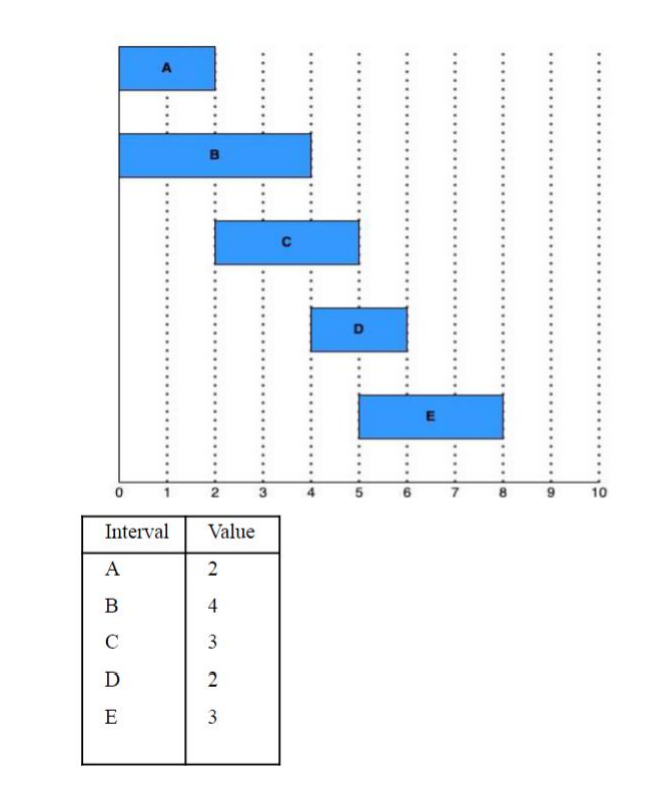

### Solution

**Formula:**

M[j] = max((vj + M[pj]), M[j-1])<br>
M[A] = max ((2 + 0), 0)) = 2<br>
M[B] = max ((4 + 0), 2)) = 4<br>
M[C] = max((3 + 2), 4)) = 5<br>
M[D] = max((2 + 4), 5)) = 6<br>
M[E] = max ((3 + 5), 6)) = 8<br>

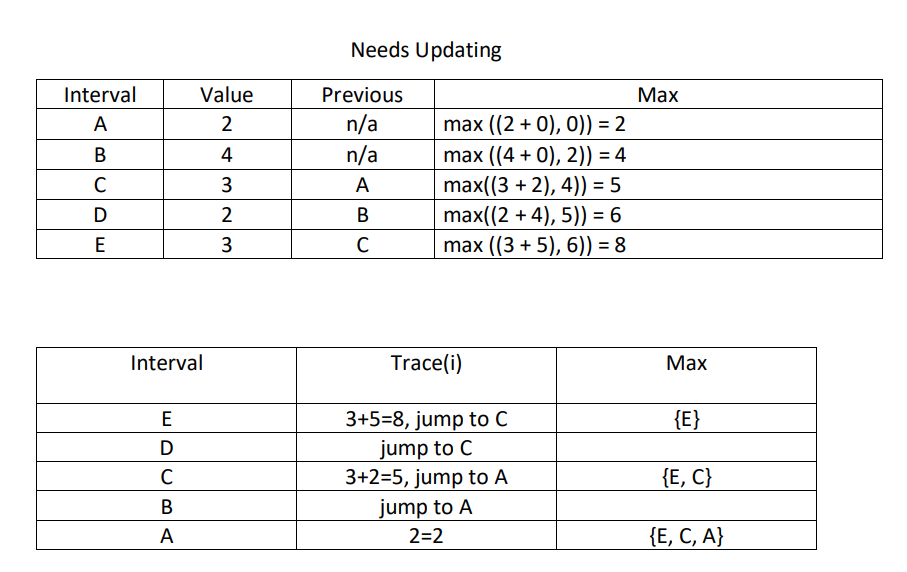

S = {E, C, A} with a combined weight of 8.

### 9)

Given the weights and values of the five items in the table below, select a subset
of items with the maximum combined value that will fit in a knapsack with a
weight limit, W, of 10. Use dynamic programming. Show your work.

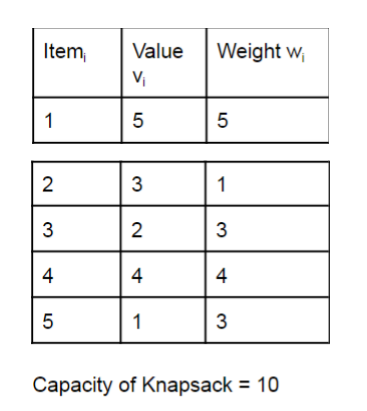

### Solution

**Formula:**

T (i, j) = Max(T(i-1, j),(Value)i + T(i-1, j-(weight)i))<br>

T (1,1) = Max(T(1-1,1), 5 + T(1-1, 1-5))<br>
 = Max(T (0,1), T(0, -4))<br>
 = T (0,1) [Ignoring negative terms]<br>
 = 0<br>
 
T (1,2) = Max(T(1-1,2), 5 + T(1-1, 2-5))<br>
 = Max(T (0,2), 5+T(0, -3))<br>
 = T (0,2) [Ignoring negative terms]<br>
 = 0<br>
 
T (1,3) = Max(T(1-1,3), 5 + T(1-1, 3-5))<br>
 = Max(T (0,3), 5+T(0, -3))<br>
 = T (0,3) [Ignoring negative terms]<br>
 = 0<br>
 
T (1,4) = Max(T(1-1,4), 5 + T(1-1, 4-5))<br>
 = Max(T (0,4), 5+T(0, -1))<br>
 = T (0,4) [Ignoring negative terms]<br>
 = 0<br>
 
T (1,5) = Max(T(1-1,5), 5 + T(1-1, 5-5))<br>
 = Max(T (0,5), 5+T(0, 0))<br>
 = 5<br>
 
T (1,6) = Max(T(1-1,6), 5 + T(1-1, 6-5))<br>
 = Max(T (0,6), 5+T(0, 1))<br>
 = 5<br>
 
T (1,7) = Max(T(1-1,7), 5 + T(1-1, 7-5))<br>
 = Max(T (0,7), 5+T(0, 2))<br>
 = 5<br>
 
T (1,8) = Max(T(1-1,8), 5 + T(1-1, 8-5))<br>
 = Max(T (0,8), 5+T(0, 3))<br>
 = 5<br>
 
T (1,9) = Max(T(1-1,9), 5 + T(1-1, 9-5))<br>
 = Max(T (0,9), 5+T(0, 4))<br>
 = 5<br>
 
T (1,10) = Max(T(1-1,10), 5 + T(1-1, 10-5))<br>
 = Max(T (0,10), 5+T(0, 5))<br>
 = 5<br>
 
T (2,1) = Max(T(2-1,1), 3 + T(2-1, 1-1))<br>
 = Max(T (1,1), 3+T(1, 0))<br>
 = 3<br>
 
T (2,2) = Max(T(2-1,2), 3 + T(2-1, 2-1))<br>
 = Max(T (1,2), 3+T(1, 1))<br>
 = 3<br>
 
T (2,3) = Max(T(2-1,3), 3 + T(2-1, 3-1))<br>
 = Max(T (1,3), 3+T(1, 2))<br>
 = 3<br>
 
T (2,4) = Max(T(2-1,4), 3 + T(2-1, 4-1))<br>
 = Max(T (1,4), 3+T(1, 3))<br>
 = 3<br>
 
T (2,5) = Max(T(2-1,5), 3 + T(2-1, 5-1))<br>
 = Max(T (1,5), 3+T(1, 4))<br>
 = 5<br>
 
T (2,6) = Max(T(2-1,6), 3 + T(2-1, 6-1))<br>
 = Max(T (1,6), 3+T(1, 5))<br>
 = 8<br>
 
T (2,7) = Max(T(2-1,7), 3 + T(2-1, 7-1))<br>
 = Max(T (1,7), 3+T(1, 6))<br>
 = 8<br>
 
T (2,8) = Max(T(2-1,8), 3 + T(2-1, 8-1))<br>
 = Max(T (1,8), 3+T(1, 7))<br>
 = 8<br>
 
T (2,9) = Max(T(2-1,9), 3 + T(2-1, 9-1))<br>
 = Max(T (1,9), 3+T(1, 8))<br>
 = 8<br>
 
T (2,10) = Max(T(2-1,10), 3 + T(2-1, 10-1))<br>
 = Max(T (1,10), 3+T(1, 9))<br>
 = 8<br>
 
T (3,1) = Max(T(3-1,1), 2 + T(3-1, 1-3))<br>
 = Max(T (2,1), 2+T(2, -2))<br>
 = T(2,1) [ignoring negative terms]<br>
 = 3<br>
 
T (3,2) = Max(T(3-1,2), 2 + T(3-1, 2-3))<br>
 = Max(T (2,2), 2+T(2, -1))<br>
 = 3<br>
 
T (3,3) = Max(T(3-1,3), 2 + T(3-1, 3-3))<br>
 = Max(T (2,3), 2+T(2, 0))<br>
 = 3<br>
 
T (3,4) = Max(T(3-1,4), 2 + T(3-1, 4-3))<br>
 = Max(T (2,4), 2+T(2, 1))<br>
 = 5<br>
 
T (3,5) = Max(T(3-1,5), 2 + T(3-1, 5-3))<br>
 = Max(T (2,5), 2+T(2,2))<br>
 = 5<br>
 
T (3,6) = Max(T(3-1,6), 2 + T(3-1, 6-3))<br>
 = Max(T (2,6), 2+T(2,3))<br>
 = 8<br>
 
T (3,7) = Max(T(3-1,7), 2 + T(3-1, 7-3))<br>
 = Max(T (2,7), 2+T(2,4))<br>
 = 8<br>
 
T (3,8) = Max(T(3-1,8), 2 + T(3-1, 8-3))<br>
 = Max(T (2,6), 2+T(2,5))<br>
 = 8<br>
 
T (3,9) = Max(T(3-1,9), 2 + T(3-1, 9-3))<br>
 = Max(T (2,9), 2+T(2,6))<br>
 = 10<br>
 
T (3,10) = Max(T(3-1,10), 2 + T(3-1, 10-3))<br>
 = Max(T (2,10), 2+T(2,7))<br>
 = 10<br>
 
T (4,1) = Max(T(4-1,1), 4 + T(4-1, 1-4))<br>
 = Max(T (3,1), 4+T(3,-3))<br>
 = T(3,1) [Ignoring negatives]<br>
= 3<br>

T (4,2) = Max(T(4-1,2), 4 + T(4-1, 2-4))<br>
 = Max(T (3,2), 4+T(3,-2))<br>
 = T(3,2) [Ignoring negatives]<br>
= 3<br>

T (4,3) = Max(T(4-1,3), 4 + T(4-1, 3-4))<br>
 = Max(T (3,3), 4+T(3,-1))<br>
 = T(3,3) [Ignoring negatives]<br>
= 3<br>

T (4,4) = Max(T(4-1,4), 4 + T(4-1, 4-4))<br>
 = Max(T (3,4), 4+T(3,0))<br>
 = 5<br>
 
T (4,5) = Max(T(4-1,5), 4 + T(4-1, 5-4))<br>
 = Max(T (3,5), 4+T(3,1))<br>
 = 7<br>
 
T (4,6) = Max(T(4-1,6), 4 + T(4-1, 6-4))<br>
 = Max(T (3,6), 4+T(3,2))<br>
 = 8<br>
 
T (4,7) = Max(T(4-1,7), 4 + T(4-1, 7-4))<br>
 = Max(T (3,7), 4+T(3,3))<br>
 = 8<br>
 
T (4,8) = Max(T(4-1,8), 4 + T(4-1, 8-4))<br>
 = Max(T (3,8), 4+T(3,4))<br>
 = 9<br>
 
T (4,9) = Max(T(4-1,9), 4 + T(4-1, 9-4))<br>
 = Max(T (3,9), 4+T(3,5))<br>
 = 10<br>
 
T (4,10) = Max(T(4-1,10), 4 + T(4-1, 10-4))<br>
 = Max(T (3,10), 4+T(3,6))<br>
 = 12<br>
 
T (5,1) = Max(T(5-1,1), 1 + T(5-1, 1-5))<br>
 = Max(T (4,1), 1+T(4,-4))<br>
 = T(4,1) [Ignoring negatives]<br>
= 3<br>

T (5,2) = Max(T(5-1,2), 1 + T(5-1, 2-5))<br>
 = Max(T (4,2), 1+T(4,-3))<br>
 = T(4,2) [Ignoring negatives]<br>
= 3<br>

T (5,3) = Max(T(5-1,3), 1 + T(5-1, 3-5))<br>
 = Max(T (4,3), 1+T(4,-2))<br>
 = T(4,3) [Ignoring negatives]<br>
= 3<br>

T (5,4) = Max(T(5-1,4), 1 + T(5-1, 4-5))<br>
 = Max(T (4,4), 1+T(4,-1))<br>
 = T(4,4) [Ignoring negatives]<br>
= 5<br>

T (5,5) = Max(T(5-1,5), 1 + T(5-1, 5-5))<br>
 = Max(T (4,5), 1+T(4,0))<br>
 = 7<br>
 
T (5,6) = Max(T(5-1,6), 1 + T(5-1, 6-5))<br>
 = Max(T (4,6), 1+T(4,1))<br>
 = 8<br>
 
T (5,7) = Max(T(5-1,7), 1 + T(5-1, 7-5))<br>
 = Max(T (4,7), 1+T(4,2))<br>
 = 8<br>
 
T (5,8) = Max(T(5-1,8), 1 + T(5-1, 8-5))<br>
 = Max(T (4,8), 1+T(4,3))<br>
 = 9<br>
 
T (5,9) = Max(T(5-1,9), 1 + T(5-1, 9-5))<br>
 = Max(T (4,9), 1+T(4,4))<br>
 = 10<br>
 
T (5,10) = Max(T(5-1,10), 1 + T(5-1, 10-5))<br>
 = Max(T (4,10), 1+T(4,5))<br>
 = 12
 
 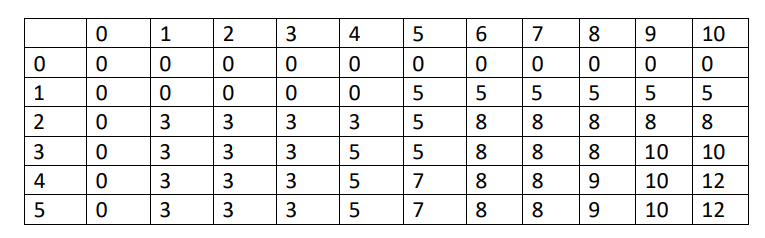
 
Subset of Item that will have the maximum combined value that will fit in a
knapsack with a weight limit, W, of 10 is {1, 2, 4}

### 10)

Explain the Bellman-Ford algorithm and its applications in real-world scenarios. Provide a step-by-step description of how the algorithm works and discuss its time complexity. Additionally, discuss a scenario where using the Bellman-Ford algorithm is advantageous and why it is suitable for that particular situation.

### Solution

The Bellman-Ford algorithm is a dynamic programming-based algorithm used to find the shortest path in a weighted directed graph, which may contain negative edge weights. It's a versatile algorithm that can handle graphs with negative weight edges as long as there are no negative weight cycles, making it suitable for a wide range of real-world applications.

**How the Bellman-Ford Algorithm Works:**

1. Initialize an array to store the shortest distance from the source vertex to all other vertices. Initially, set the distance to the source vertex as 0 and all other distances to positive infinity.

2. Iterate over all edges multiple times (for a total of V-1 iterations, where V is the number of vertices). In each iteration, update the distance values if a shorter path is found.

3. In each iteration, for each edge (u, v) in the graph, if the distance to vertex u plus the weight of the edge (u, v) is less than the current distance to vertex v, update the distance to vertex v with this shorter distance.

4. After V-1 iterations, the algorithm ensures that the shortest paths from the source vertex to all other vertices have been found.

5. To check for negative weight cycles, perform one more iteration. If any distance is updated, it means there is a negative weight cycle in the graph.

**Time Complexity:**

The Bellman-Ford algorithm has a time complexity of O(V * E), where V is the number of vertices and E is the number of edges. This makes it less efficient than algorithms like Dijkstra's algorithm for graphs with non-negative weights.

**Applications:**

1. **Network Routing:** Bellman-Ford is used in network routing protocols, where it finds the shortest path in computer networks. It can handle routing scenarios where link costs may change due to network congestion or failure.

2. **Arbitrage Detection:** In finance, it's used to detect arbitrage opportunities in currency exchange markets. Negative weight cycles can indicate profit opportunities through currency exchange.

3. **Traffic Engineering:** In transportation and traffic engineering, the Bellman-Ford algorithm can be used to optimize traffic routing by finding the shortest paths with consideration for traffic congestion or road closures.

4. **Resource Allocation:** It's applied in resource allocation problems, where resources have costs, and finding the most cost-efficient allocation is essential.

5. **Circuit Design:** The Bellman-Ford algorithm is used in circuit design and PCB routing to find the optimal paths for electrical connections.

In summary, the Bellman-Ford algorithm is a valuable tool in various real-world scenarios where finding the shortest path in a weighted graph is crucial, especially when the graph may contain negative edge weights or when negative weight cycles need to be detected.